In [1]:
import pandas as pd

In [6]:
mta_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180324.txt')
mta_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180331.txt')
mta_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180407.txt')

In [92]:
mta = mta_1.append(mta_2, ignore_index=True)
mta = mta.append(mta_3, ignore_index=True)
mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,00:00:00,REGULAR,6552626,2219139
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,04:00:00,REGULAR,6552626,2219140
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,08:00:00,REGULAR,6552626,2219140
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,12:00:00,REGULAR,6552626,2219140
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,16:00:00,REGULAR,6552626,2219140
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,20:00:00,REGULAR,6552626,2219140
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2018,00:00:00,REGULAR,6552626,2219140
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2018,04:00:00,REGULAR,6552626,2219140
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2018,08:00:00,REGULAR,6552626,2219140
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2018,12:00:00,REGULAR,6552626,2219140


In [68]:
mta['DATETIME'] = mta['DATE'] + ' ' + mta['TIME']
mta['DATETIME'] = pd.to_datetime(mta['DATETIME'], format = '%m/%d/%Y %H:%M:%S')
mta.drop(labels=['DATE','TIME'],axis=1,inplace=True)
#mta.rename(columns={'EXITS                                                               ','EXIT'})

In [71]:
#mta.rename(columns=str.strip(' '),inplace=True)
mta.rename(columns = {'EXITS                                                               ' : 'EXITS'}, inplace = True)

In [73]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC',
       'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [36]:
#mta_mulix = mta.set_index(['C/A','UNIT','SCP','STATION'])

In [85]:
mta_grouped = mta.groupby(['C/A','UNIT','SCP','STATION'])
mta_better = mta_grouped.resample('D',on='DATETIME').apply(lambda x: x.EXITS.max() - x.EXITS.min())

In [83]:
mta[['ENTRIES','EXITS']].head()

,ENTRIES,EXITS
0,6552626,2219139
1,6552626,2219140
2,6552626,2219140
3,6552626,2219140
4,6552626,2219140


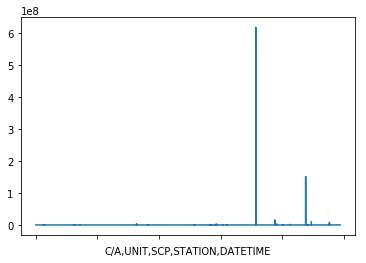

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

mta_better.plot()